Данные

Игра содержит особое событие – ивент, для прохождения которого пользователи могут тратить деньги. Группа дизайнеров решила поменять вид окошка покупки ивентовых продуктов. Чтобы оценить результат нововведения, провели АБ тест, разделив пользователей на две группы: контрольную и тестовую (с окошком нового типа).

Задача
Исследовать какая из АБ групп лучше себя показала. Результаты предоставить в понятной для широкой аудитории форме, сопроводив по необходимости графиками/дашбордами/числами. Колонки

AbGroup – имя АБ группы: Control/Test
user_id – id пользователя
time_stamp – день события
install_date – день установки приложения пользователем
event_name – техническое название события (InAppPurchase - в случае покупки за деньги, ResourceSpend в случае покупки за игровую валюту)
platform – платформа google / itunes
network_name – пользователь установил игру по переходу с рекламы (Paid) или нет (Organic)
country_name – страна пользователя
InGameTime – сколько всего пользователь провел в игре секунд
LastCompletedLevel – номер последнего пройденного уровня
avg_energy_amount – сколько в среднем энергии было у пользователя за день
revenue_on_event – ревеню, потраченное на покупку ивентовых продуктов
revenue_on_other_activities – ревеню, потраченное на остальные продукты, включая золото
gold_on_event – золото, потраченное на ивентный прогресс
gold_on_other_activities – золото, потраченное на другие продукты

In [1]:
import pandas as pd 
df = pd.read_csv('test_task_product_analyst_2021_20210427.csv')
df.head()

C:\Users\Aleksey\AppData\Local\Temp\ipykernel_10108\3062214847.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,AbGroup,user_id,time_stamp,install_date,event_name,platform,network_name,country_name,InGameTime,LastCompletedLevel,avg_energy_amount,revenue_on_event,revenue_on_other_activities,gold_on_event,gold_on_other_activities
0,Control,d60ebcaecff2dc1d360a8a41271e6fd8a902c107,2020-02-10,2019-11-10,ResourceSpend,itunes,Organic,United Kingdom of Great Britain and Northern I...,276180,345,54.0,0.0,0.0,NaN,NaN
1,Test,f6e385b0ab43d5aea9cfcc408aa84029a4ea5fdb,2020-03-04,2019-11-05,ResourceSpend,itunes,Paid,United States of America,166095,199,50.0,0.0,0.0,NaN,NaN
2,Control,a4c80c8524e2c11cc238553d7b02da01ce2aad66,2020-02-26,2020-01-02,ResourceSpend,itunes,Paid,Canada,240986,84,39.0,0.0,0.0,NaN,NaN
3,Control,7ea2e4599ae33760c307e254839317bd5b17a63c,2020-02-21,2020-01-13,ResourceSpend,itunes,Organic,France,989822,1176,21.0,0.0,0.0,NaN,NaN
4,Control,6495168982929360dc6d84bf0766d8963a7ddc41,2020-02-18,2020-02-05,ResourceSpend,itunes,Paid,Spain,52106,66,43.0,0.0,0.0,500.0,NaN


In [2]:
len(df)

696840

In [3]:
df['AbGroup'].value_counts()

AbGroup
Control    558070
Test       138770
Name: count, dtype: int64

In [4]:
df['AbGroup'].value_counts(normalize=True)


AbGroup
Control    0.800858
Test       0.199142
Name: proportion, dtype: float64

In [5]:
df.groupby('AbGroup')['user_id'].agg(['count','nunique'])

,count,nunique
AbGroup,,
Control,558070,89034
Test,138770,22278


<Axes: xlabel='time_stamp'>

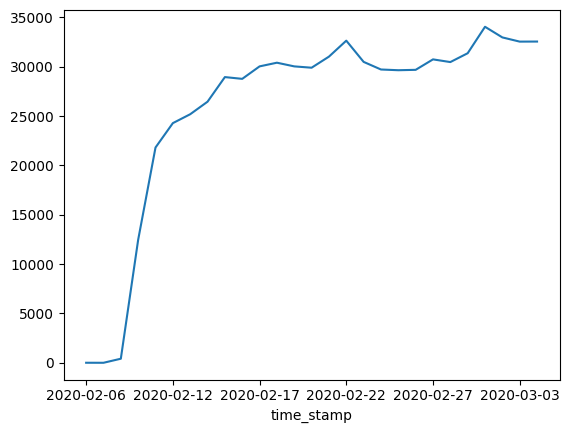

In [6]:
df.groupby('time_stamp')['user_id'].count().plot()

In [7]:
df.groupby('time_stamp')['user_id'].agg(['count','nunique'])

,count,nunique
time_stamp,,
2020-02-06,4,3
2020-02-08,1,1
2020-02-09,413,410
2020-02-10,12472,12445
2020-02-11,21822,21767
2020-02-12,24292,24225
2020-02-13,25194,25131
2020-02-14,26464,26407
2020-02-15,28959,28894


In [13]:
df['gold_on_event_flag'] = (df['gold_on_event'] > 0)*1
df['gold_on_other_activities_flag'] = (df['gold_on_other_activities'] > 0)*1
(df.groupby(['AbGroup'])
[['gold_on_event_flag','gold_on_event']]
 .agg({'gold_on_event_flag':['count','mean'],
       'gold_on_event':['mean','median']}))

gold_on_event_flag          gold_on_event        
                     count     mean          mean  median
AbGroup                                                  
Control             558070  0.06523   1965.211658  1000.0
Test                138770  0.06492   2104.606505  1500.0

In [9]:
group1 = df[df['AbGroup']=='Test']
group2 = df[df['AbGroup']=='Control']

In [10]:
from scipy.stats import ttest_ind
ttest_ind(group1['gold_on_event_flag'], group2['gold_on_event_flag'])

TtestResult(statistic=-0.41842340520378485, pvalue=0.6756377060332278, df=696838.0)

In [11]:
ttest_ind(group1['gold_on_other_activities_flag'], group2['gold_on_other_activities_flag'])

TtestResult(statistic=-0.07895782566696165, pvalue=0.9370661911998194, df=696838.0)